# Attrition HR Data Analytics Project

In [73]:
%pip install seaborn
%pip install scipy
%pip install squarify

In [74]:
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
import squarify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [75]:
attrition=pd.read_csv('Attrition data.csv')

In [76]:
attrition.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [77]:
#getting real attrition value
apt=attrition['Attrition'].value_counts()
current_atr_rate=(apt['Yes']/4410)*100
print(current_atr_rate)


16.122448979591837


In [78]:
#dropping null values
real_atr=attrition[attrition['Attrition']=='Yes'].dropna()
no_atr=attrition[attrition['Attrition']=='No'].dropna()

# Arrition By Diffrent Aspects Analyzed

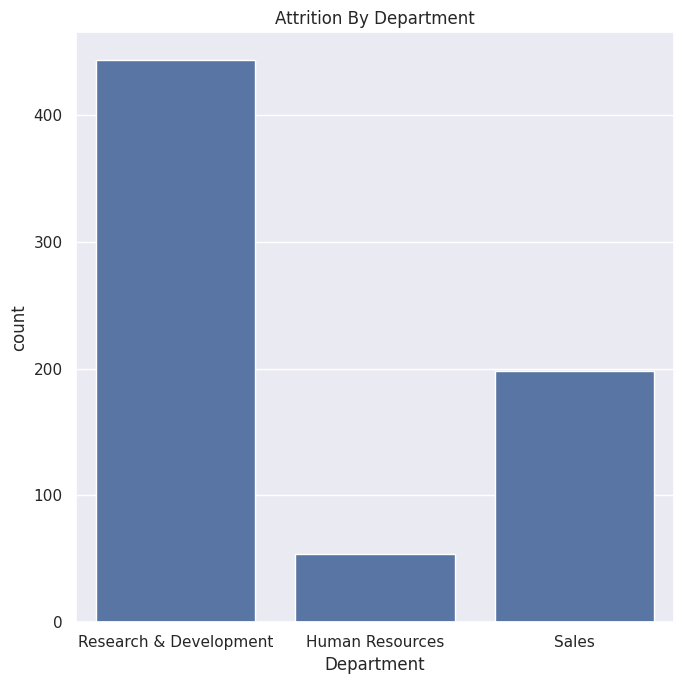

In [79]:
#Attrition By Department
plt.figure(figsize=(7,7))
sns.set_theme()
ax=sns.countplot(data=real_atr,x='Department',hue='Attrition')
plt.title('Attrition By Department')
plt.legend().set_visible(False)
plt.tight_layout()


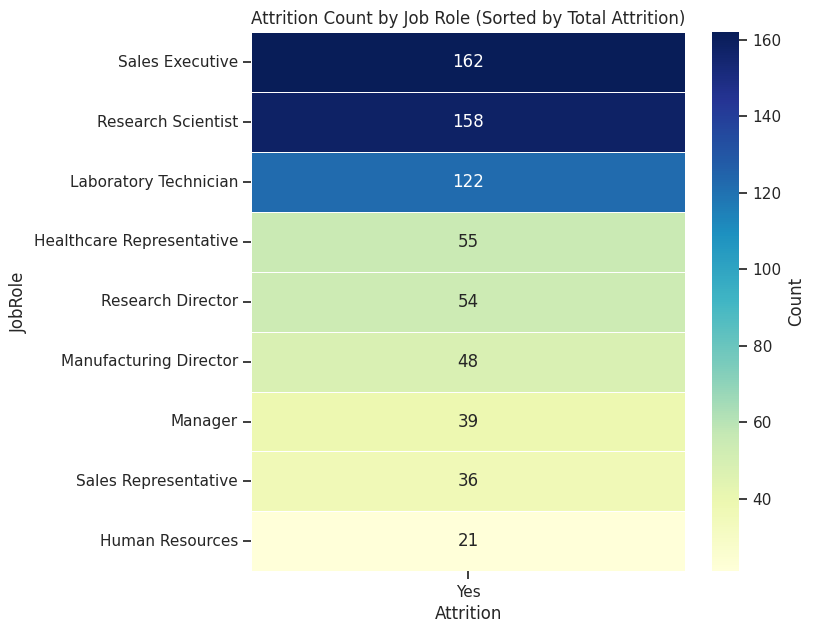

In [80]:
#heatmap for job roles and attrtion
heatmap_data = real_atr.pivot_table(index='JobRole', columns='Attrition', aggfunc='size', fill_value=0)


heatmap_data['Total'] = heatmap_data.sum(axis=1)

heatmap_data = heatmap_data.sort_values(by='Total', ascending=False).drop(columns='Total')


plt.figure(figsize=(7, 7))
sns.set_theme(style='ticks')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, linewidths=.5)
plt.title('Attrition Count by Job Role (Sorted by Total Attrition)')
plt.show()

Text(0.5, 1.0, 'Attrition and Job Satisfaction')

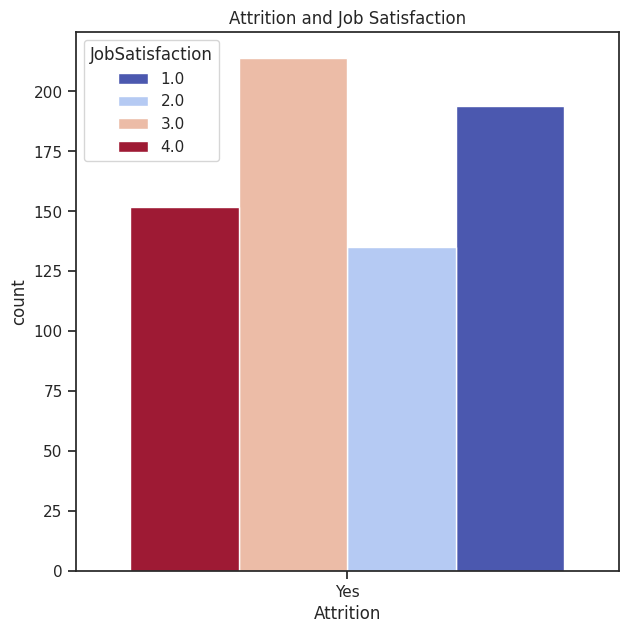

In [81]:
#attrtion and Job satisfaction
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='JobSatisfaction',palette='coolwarm').invert_xaxis()
plt.title('Attrition and Job Satisfaction')

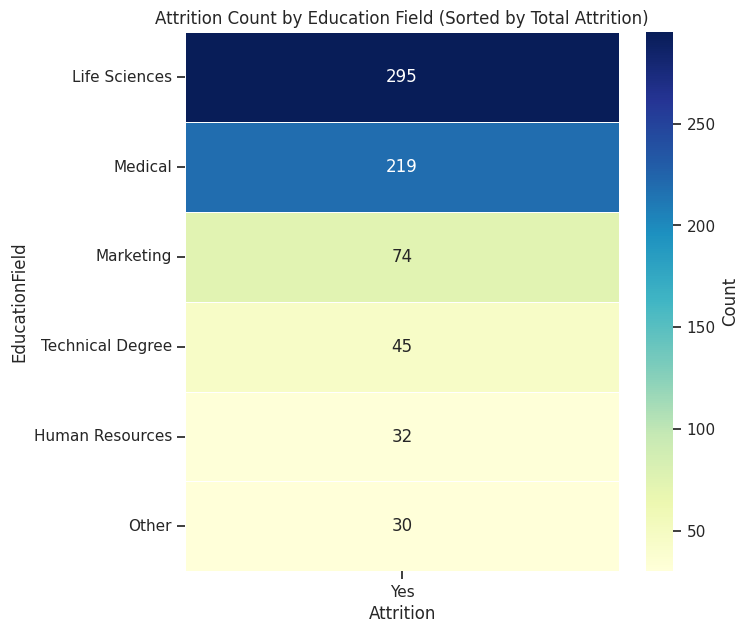

In [82]:
heatmap_data = real_atr.pivot_table(index='EducationField', columns='Attrition', aggfunc='size', fill_value=0)

# Calculate the total attrition (Yes + No) for each JobRole to sort
heatmap_data['Total'] = heatmap_data.sum(axis=1)

# Sort the pivot table by total attrition in descending order
heatmap_data = heatmap_data.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot the heatmap
plt.figure(figsize=(7, 7))
sns.set_theme(style='ticks')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, linewidths=.5)
plt.title('Attrition Count by Education Field (Sorted by Total Attrition)')
plt.show()

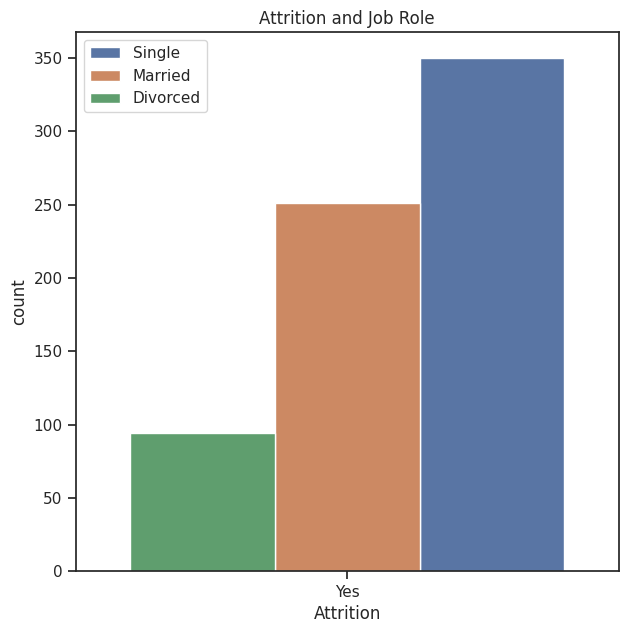

In [83]:
#marital status and Attrtion
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='MaritalStatus').invert_xaxis()
plt.title('Attrition and Job Role')
plt.legend(loc='upper left')

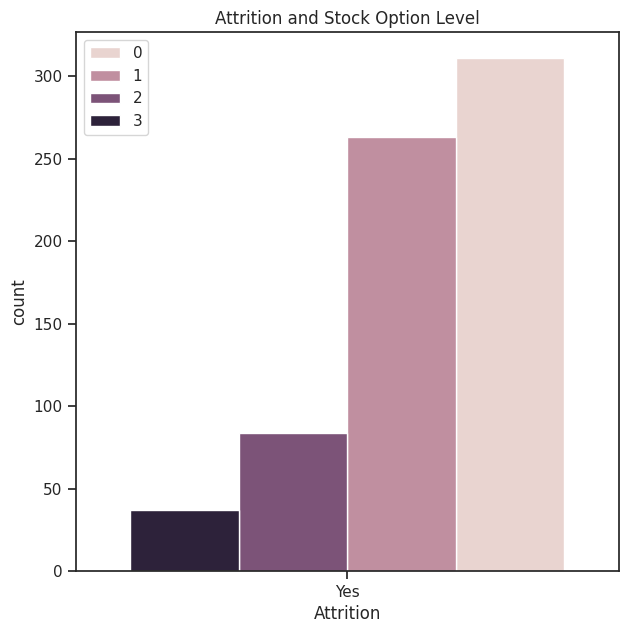

In [84]:
#attritiona and stockoptions
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='StockOptionLevel').invert_xaxis()
plt.title('Attrition and Stock Option Level')
plt.legend(loc='upper left')

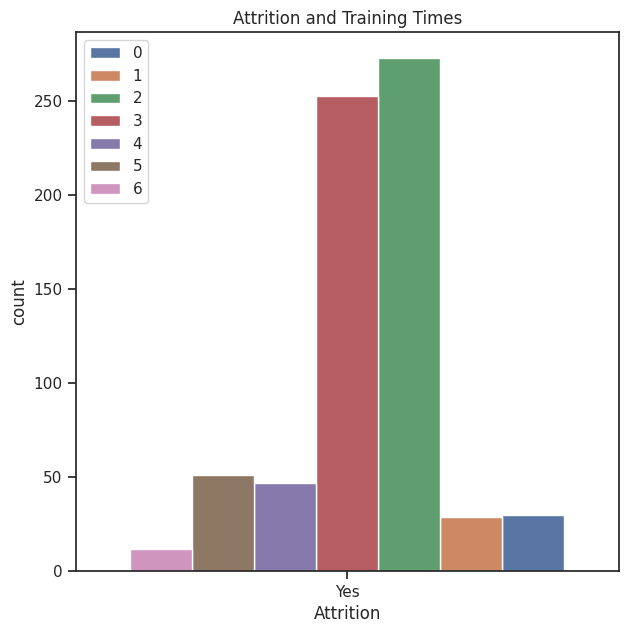

In [85]:
#attrtion and Training times
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='TrainingTimesLastYear',palette='deep').invert_xaxis()
plt.title('Attrition and Training Times')
plt.legend(loc='upper left')

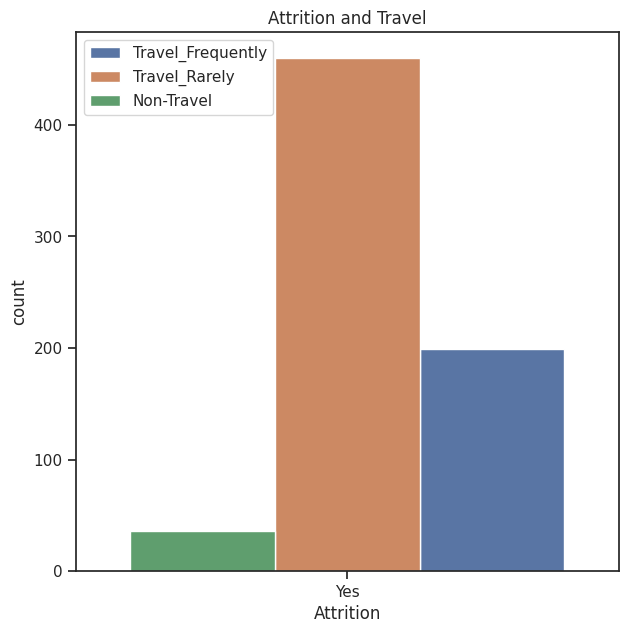

In [86]:
#attrition And travel
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='BusinessTravel').invert_xaxis()
plt.title('Attrition and Travel')
plt.legend(loc='upper left')

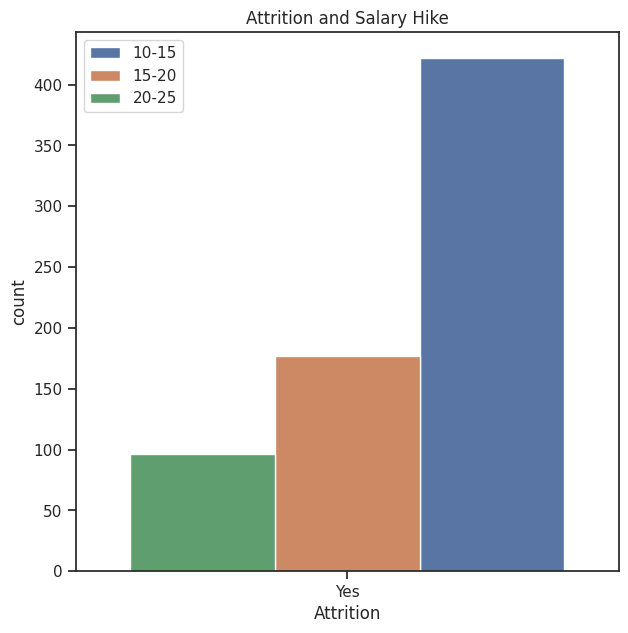

In [87]:
#attrtion and salary hike
real_atr['PercentSalaryHike']=pd.cut(real_atr['PercentSalaryHike'],bins=[10,15,20,25],labels=['10-15','15-20','20-25'])
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='PercentSalaryHike',palette='deep').invert_xaxis()
plt.title('Attrition and Salary Hike')
plt.legend(loc='upper left')

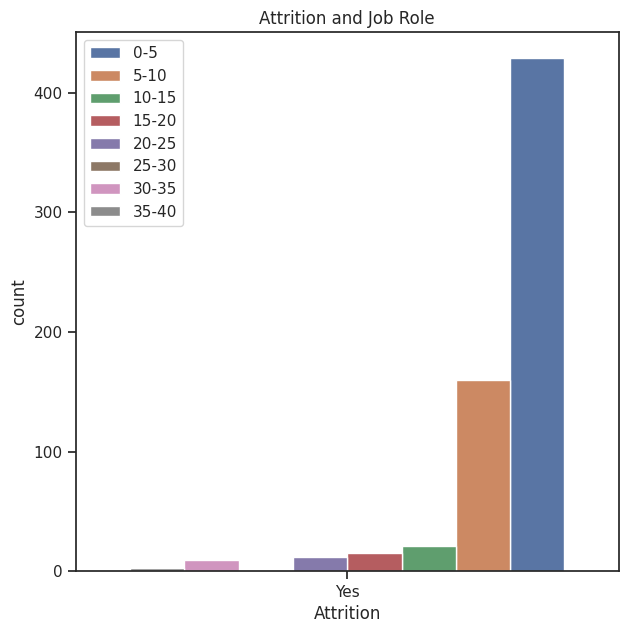

In [88]:
real_atr['YearsAtCompany']=pd.cut(real_atr['YearsAtCompany'],bins=[0,5,10,15,20,25,30,35,40],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40'])
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='YearsAtCompany',palette='deep').invert_xaxis()
plt.title('Attrition and Job Role')
plt.legend(loc='upper left')

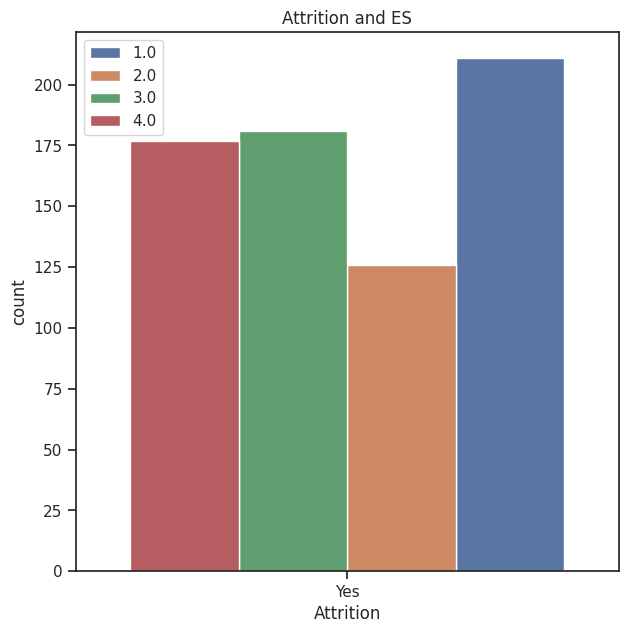

In [89]:
#attrition and Enviroment satisfaction
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='EnvironmentSatisfaction',palette='deep').invert_xaxis()
plt.title('Attrition and ES')
plt.legend(loc='upper left')

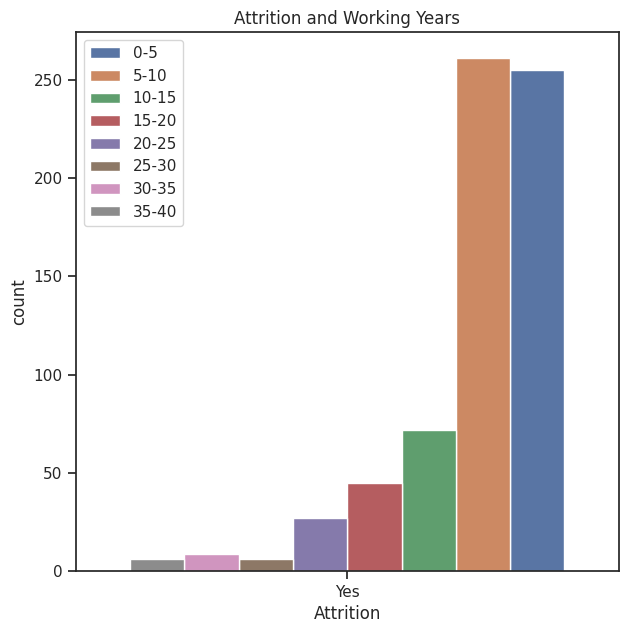

In [90]:
#attrtion and working years
real_atr['TotalWorkingYears']=pd.cut(real_atr['TotalWorkingYears'],bins=[0,5,10,15,20,25,30,35,40],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40'])
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')
sns.countplot(data=real_atr,x='Attrition',hue='TotalWorkingYears',palette='deep').invert_xaxis()
plt.title('Attrition and Working Years')
plt.legend(loc='upper left')

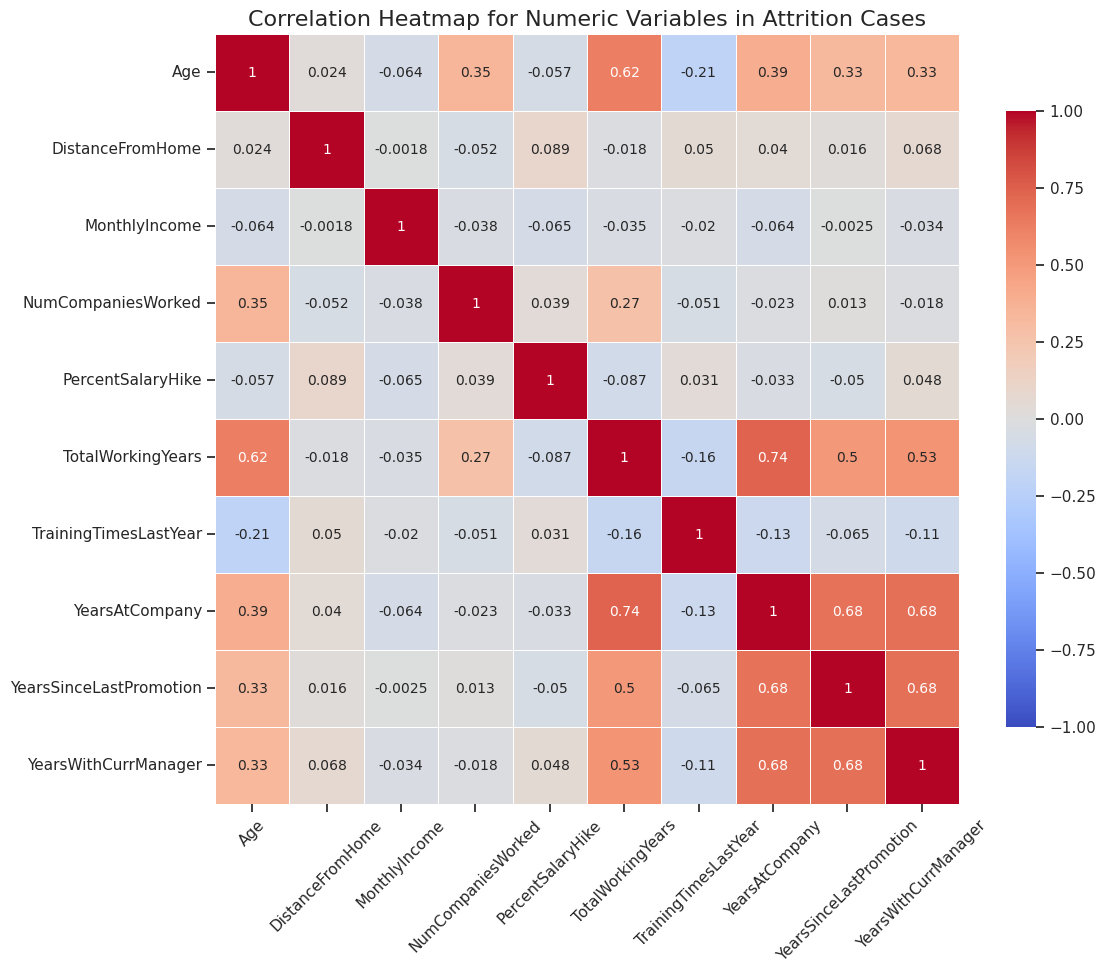

In [94]:
#General HeatMap for all numeric columns
def convert_range(value):
    if isinstance(value, str) and '-' in value:
        nums = value.split('-')
        return (float(nums[0]) + float(nums[1])) / 2 
    return float(value) 


for column in numerical_columns:
    real_atr[column] = real_atr[column].apply(convert_range)

correlation_matrix = real_atr[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numeric Variables in Attrition Cases', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# **Findings**:
The strongest impact on attrition comes from marital status.

Strong Impact from weak Work Life Balance.

Moderate Impact from lack of travel.

Moderate Impact from Environment Satisfaction.

Moderate Impact from Job Satisfaction.

HR has a low count of Attrtion but the highest percent of total employees leaving from a department.

# **Recommendations**:
Certain aspects of work lead to a substantial drop off in attrition if ameliorated tactfully.

The trend is skewed towards young single men who haven't been working in the company for too long. 

This trend should lead to a general inquiry in employment opportunities in the business for junior workers.

Additionally, poor job and environment satisfaction should be improved for the strongest impact on reducing attrition rates.
